# Data Science with pandas

## Preliminaries

### Importing package and checking version

In [2]:
import pandas as pd
print(pd.__version__)

1.4.2


Let's try out the Pandas library!

### Verifying current directory and set up data directory 

In [3]:
import os
cwd = os.getcwd()
print(cwd)

/Volumes/Samsung_T5/uu_job/workshops/workshop-introduction-to-python/book


In [4]:
data_file = './data/surveys.csv'

In [5]:
print(os.path.exists(data_file))

True


### Reading the CSV file into a pandas DataFrame and giving a quick look

In [6]:
surveys_df = pd.read_csv(data_file)

print(type(data_file))
print(type(surveys_df))

<class 'str'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> Type the following commands and check out the outputs. Can you tell what each command does? What is the difference between commands with and without parenthesis?
</div>

```python
surveys_df.shape
surveys_df.columns
surveys_df.index
surveys_df.dtypes
surveys_df.head(<try_various_integers_here>)
surveys_df.tail(<try_various_integers_here>)
```

## Basic statistics

Let's first visualise all the column names in the data frame

In [8]:
print(surveys_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


We can use the loops we learned this morning to print them one by one:

In [9]:
for column in surveys_df.columns:
    print(column)

record_id
month
day
year
plot_id
species_id
sex
hindfoot_length
weight


Let's select the column *weight* and run some statistics on it

In [10]:
weight = surveys_df['weight']
print(type(weight))

<class 'pandas.core.series.Series'>


*weight* is a pandas core object, a **Series**. You can think at a pandas Series as a python list, or numpy array, with extra powers. One of these extra powers is simple plotting, just to have a first glance at data: 

<AxesSubplot:ylabel='Frequency'>

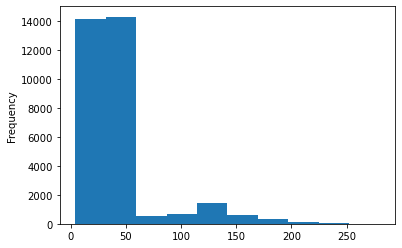

In [11]:
%matplotlib inline
weight.plot(kind='hist')

<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> Perform some basic statistics on the "weight" column. Can you tell what each method does? Look at our explorative plot, does the statistics you computed make sense?
</div>

```python
weight.min()
weight.max()
weight.mean()
weight.std()
weight.counts()
```

A statistical summary in one line

In [12]:
weight.describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

Let's look at another columns and let's check if all its values are unique:

In [13]:
print(len(surveys_df['plot_id']))
print(surveys_df['plot_id'].nunique())

35549
24


## Grouping

Shall we add a session with statistics with grouping?

## Indexing, Slicing, and Subsetting DataFrames

### Selecting 

Let's look again at the DataFrame columns

In [17]:
sel_index = 5
for i,col in enumerate(surveys_df.columns):
    if i == sel_index:
        print('{}) {} <==='.format(i,col))
    else:
        print('{}) {}'.format(i,col))

0) record_id
1) month
2) day
3) year
4) plot_id
5) species_id <===
6) sex
7) hindfoot_length
8) weight


We already discussed how to select a specific DataFrame column

In [42]:
#By name
# --------------------------------------
#Method1
plot_id_1 = surveys_df['species_id']

#Method2
plot_id_2 = surveys_df.species_id
# --------------------------------------

#By location
# --------------------------------------
#Method3
plot_id_3 = surveys_df[surveys_df.columns[5]]

#Method4
plot_id_4 = surveys_df.iloc[:,5]
# --------------------------------------

print('1 is 2 ?',plot_id_1 is plot_id_2,'(',id(plot_id_1),id(plot_id_2),')')
print('1 is 3 ?',plot_id_1 is plot_id_3,'(',id(plot_id_1),id(plot_id_3),')')
print('1 is 4 ?',plot_id_1 is plot_id_4,'(',id(plot_id_1),id(plot_id_4),')')
print()
print('1 == 4 ?',any(plot_id_1==plot_id_2))

1 is 2 ? True ( 140268961318560 140268961318560 )
1 is 3 ? True ( 140268961318560 140268961318560 )
1 is 4 ? False ( 140268961318560 140268964295104 )

1 == 4 ? True


<div class="alert alert-block alert-warning">
<b>TRY IT YOURSELF:</b> TRY IT YOURSELF: Select two different columns (['species_id','plot_id]) from the DataFrame surveys_df using method 1. Check the data type of the output, what is it?
</div>

### Selecting by data type

In [45]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [47]:
surveys_df_float_sel = surveys_df.select_dtypes(include = ['float64'])
print(type(surveys_df_float_sel))

<class 'pandas.core.frame.DataFrame'>


In [48]:
surveys_df_float_sel.dtypes

hindfoot_length    float64
weight             float64
dtype: object

### Selecting by string in name

In [50]:
print(surveys_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


In [51]:
surveys_df_str_sel = surveys_df.filter(like='_id')
print(type(surveys_df_str_sel))

<class 'pandas.core.frame.DataFrame'>


In [53]:
surveys_df_str_sel.head()

,record_id,plot_id,species_id
0,1,2,NL
1,2,3,NL
2,3,2,DM
3,4,7,DM
4,5,3,DM


This is a book created from markdown and executable code.

See @knuth84 for additional discussion of literate programming.